In [190]:
import pandas as pd
import numpy as np


In [191]:
df = pd.read_csv('stud.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [193]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [194]:
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64


In [195]:
print(df)

    StudentID  Age              email hrsStudy  FinalGrade
0       47412   20  s47412@oslomet.no        5        46.0
1       15077   22  s15077@oslomet.no        0        65.0
2       15467   27  s15467@oslomet.no        1        26.0
3       17907   21  s17907@oslomet.no        6        68.0
4       13352  333  s13352@oslomet.no        4        34.0
5       88403   29  s88403@oslomet.no       11        62.0
6       56387   32  s56387@oslomet.no        9        29.0
7       95648   23  s95648@oslomet.no        3        38.0
8       63176   20  s63176@oslomet.no        0        98.0
9       15406   31  s15406@oslomet.no        2        68.0
10      41908   24  s41908@oslomet.no        0        62.0
11      35600   30  s35600@oslomet.no       11        70.0
12      16171   25  s16171@oslomet.no       10        81.0
13      55586   24  s55586@oslomet.no        7        31.0
14      71505   23  s71505@oslomet.no        1        49.0
15      31235   33  s31235@oslomet.no        1        72

In [196]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')
df['hrsStudy'] = pd.to_numeric(df['hrsStudy'], errors='coerce', downcast='integer')
df['Age'] = df['Age'].astype('Int32')
df['hrsStudy'] = df['hrsStudy'].astype('Int32')

<Axes: >

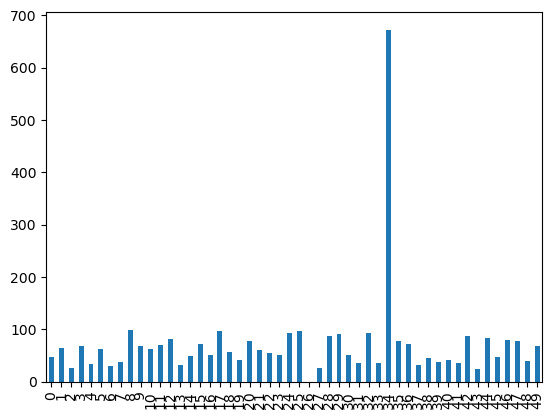

In [197]:
df["FinalGrade"].plot.bar()


In [198]:
z_scores = (df['FinalGrade'] - df['FinalGrade'].mean()) / df['FinalGrade'].std()
abs_z_scores = np.abs(z_scores)
threshold = 3
filtered_entries = (abs_z_scores < threshold)
df_clean = df[filtered_entries]

In [199]:
df_clean.to_csv('cleaned_data.csv', index=False)


<Axes: >

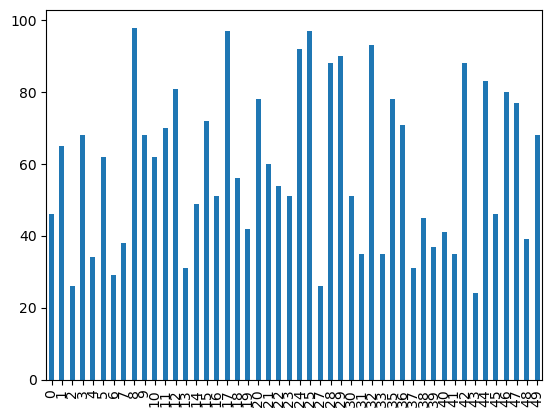

In [200]:
df_clean["FinalGrade"].plot.bar()

In [201]:
print("\nDataFrame after removing outliers:")
print(df_clean)


DataFrame after removing outliers:
    StudentID   Age              email  hrsStudy  FinalGrade
0       47412    20  s47412@oslomet.no         5        46.0
1       15077    22  s15077@oslomet.no         0        65.0
2       15467    27  s15467@oslomet.no         1        26.0
3       17907    21  s17907@oslomet.no         6        68.0
4       13352   333  s13352@oslomet.no         4        34.0
5       88403    29  s88403@oslomet.no        11        62.0
6       56387    32  s56387@oslomet.no         9        29.0
7       95648    23  s95648@oslomet.no         3        38.0
8       63176    20  s63176@oslomet.no         0        98.0
9       15406    31  s15406@oslomet.no         2        68.0
10      41908    24  s41908@oslomet.no         0        62.0
11      35600    30  s35600@oslomet.no        11        70.0
12      16171    25  s16171@oslomet.no        10        81.0
13      55586    24  s55586@oslomet.no         7        31.0
14      71505    23  s71505@oslomet.no         1 

In [202]:
print("\nData Types:")
print(df_clean.dtypes)



Data Types:
StudentID       int64
Age             Int32
email          object
hrsStudy        Int32
FinalGrade    float64
dtype: object


In [203]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         47 non-null     Int32  
 2   email       48 non-null     object 
 3   hrsStudy    47 non-null     Int32  
 4   FinalGrade  48 non-null     float64
dtypes: Int32(2), float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [204]:
def grade_to_letter(grade):
    if grade > 90:
        return 'A'
    elif grade > 80:
        return 'B'
    elif grade > 70:
        return 'C'
    elif grade > 60:
        return 'D'
    elif grade > 50:
        return 'E'
    else:
        return 'F'

df_clean['LetterGrade'] = df_clean['FinalGrade'].apply(grade_to_letter)


/tmp/ipykernel_71263/999108732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LetterGrade'] = df_clean['FinalGrade'].apply(grade_to_letter)


In [205]:
print(df_clean[['FinalGrade', 'LetterGrade']])


    FinalGrade LetterGrade
0         46.0           F
1         65.0           D
2         26.0           F
3         68.0           D
4         34.0           F
5         62.0           D
6         29.0           F
7         38.0           F
8         98.0           A
9         68.0           D
10        62.0           D
11        70.0           D
12        81.0           B
13        31.0           F
14        49.0           F
15        72.0           C
16        51.0           E
17        97.0           A
18        56.0           E
19        42.0           F
20        78.0           C
21        60.0           E
22        54.0           E
23        51.0           E
24        92.0           A
25        97.0           A
27        26.0           F
28        88.0           B
29        90.0           B
30        51.0           E
31        35.0           F
32        93.0           A
33        35.0           F
35        78.0           C
36        71.0           C
37        31.0           F
3

<Axes: xlabel='LetterGrade'>

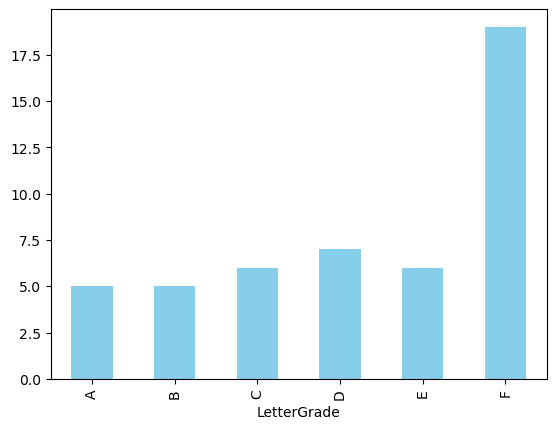

In [206]:
grade_counts = df_clean['LetterGrade'].value_counts().sort_index()
grade_counts.plot(kind='bar', color='skyblue')
